# 7 Pandas Merge Dataframe

In [48]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Example 1

Create some small dataframes to demonstrate how it works.

In [49]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [50]:
# check if it worked - yes! 

print(df_jobs)

print(df_companies)

   job_id           job_title company_name       job_location
0       1      Data Scientist       Google  Mountain View, CA
1       2   Software Engineer    Microsoft        Redmond, WA
2       3     Product Manager        Apple      Cupertino, CA
3       4  Marketing Director         Nike      Beaverton, OR
4       5          HR Manager    Starbucks        Seattle, WA
  company_name         industry company_size
0       Google       Technology     100,000+
1    Microsoft       Technology     100,000+
2        Apple       Technology     100,000+
3         Nike          Apparel      75,000+
4    Starbucks  Food & Beverage     346,000+


In [51]:
# let's use the merge method to merge both example's dataframes into one

df_jobs.merge(df_companies, on="company_name")

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


## Example 2

Let's combine a dataframe for software development jobs to the pivot table about data role postings per month in 2023 we calculate in the previous lesson (06_Exercise_Job_Demand).

In [52]:
# let's recall the code we did to get the same pivot from last time

df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [53]:
# let's make some fake data to create another dataframe to merge to the one above

import random

# set seed for randomability (so we always have the same result every time we run the random function)

random.seed(42) # the number in brackets doesn't matter

# define job titles

job_titles = ["Front-End Developer", "Back-End Developer", "Full-Stack Developer", "UI/UX Designer"]

# define months

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# define range for the random data

ranges = {
    "Front-End Developer": (11_000, 15_000),
    "Back-End Developer": (8_000, 10_000),
    "Full-Stack Developer": (5_000, 7_500),
    "UI/UX Designer": (4_000, 5_000)
}

# generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# create dataframe
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [54]:
# merge
df_US_merge = df_US_pivot.merge(df_US_software_pivot, on="job_posted_month")

df_US_merge

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In the example above, we didn't explore the "how" argument of the merge method. There are different type of joins that we can use (inner, outer, left, right).

If we don't precise anything, it is "inner by default (merges all data that is common to both dataframes).

In [55]:
# now let's look at the top 5 jobs with the highest number of postings and plot them in a graph.

top_5 = (
        df_US_merge
        .sum() # sum all job counts for each column
        .sort_values(ascending=False) # sort in descending order
        .head() # get the top 5
        .index # get only the index of the top 5
        .to_list() # transform into a list that we can use to filter
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

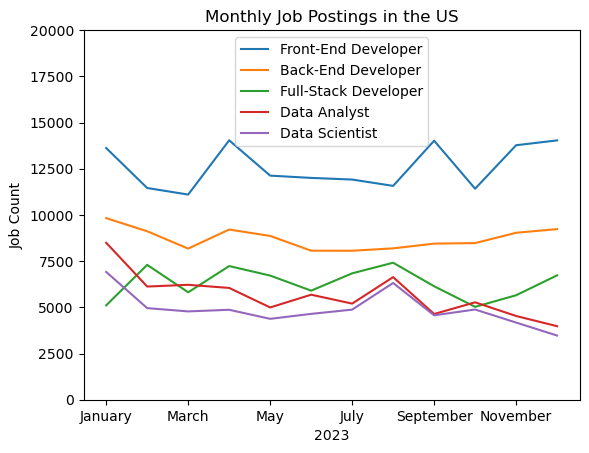

In [56]:
# plot

df_US_merge[top_5].plot(kind="line")
plt.title("Monthly Job Postings in the US")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(0, 20000)
plt.legend() # doing  that removes the ugly legend title
plt.show()

# 7 Problems

## 2.7.1

- Create a DataFrame df_us_jobs that contains job postings in the United States.
- Then create another DataFrame df_monthly_postings that counts the number of job postings for each month.
- Merge these two DataFrames on the job_posted_month column using a right join and display the first 5 rows of the resulting DataFrame.

In [58]:
# create a new column with the month
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')

# create a new dataframe for US
df_us_jobs = df[df['job_country'] == 'United States']

# create a new df that groups by months
df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')

# merge both df
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')

# keep inly the first 5
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,91822


## 2.7.2

- Create a DataFrame df_not_remote_jobs that filters job postings that do not offer remote work.
- Then create another DataFrame df_not_remote_salary that calculates the average yearly salary for these non-remote jobs. Rename this salary column salary_not_remote_avg.
- Merge these two DataFrames on the job_title_short column using a right join and display the first 5 rows of the resulting DataFrame.

In [70]:
# df_not_remote_jobs creation

df_not_remote_jobs = df[df["job_work_from_home"] == False]

# df_not_remote_salary

df_not_remote_salary = df_not_remote_jobs.copy()

df_not_remote_salary = df_not_remote_salary.pivot_table(
    values="salary_year_avg",
    index="job_title_short",
    aggfunc="mean"
)

# merge the two dfs + show first 5
df_merged = df_not_remote_jobs.merge(df_not_remote_salary, how="right", on="job_title_short")

df_merged.head()


# create a new df that groups by months
# df_monthly_postings = df.groupby('job_posted_month').size().reset_index(name='postings_count')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_year_avg_y
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


----
Alternative solution!

In [74]:
# df_not_remote creation

df_not_remote_jobs2 = df[df["job_work_from_home"] == False]

# df_not_remote_salary creation

df_not_remote_salary2 = df_not_remote_jobs2.groupby("job_title_short")["salary_year_avg"].mean().reset_index()

# rename column

df_not_remote_salary2.rename(columns={"salary_year_avg": "salary_not_remote_avg"}, inplace=True)

# merge df

df_merged2 = pd.merge(df_not_remote_jobs2, df_not_remote_salary2, how="right", on="job_title_short")

df_merged2.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06,90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",2023-03,90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-09,90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",2023-02,90177.41994


## 2.7.3

- Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
- Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. Name this count column remote_count.
- Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.

In [82]:
# create df_company_salary

df_company_salary = df.groupby("company_name")["salary_year_avg"].mean().reset_index()

# create df_company_remote

df_company_remote = df[df["job_work_from_home"] == True]

df_company_remote = df_company_remote.groupby("company_name")["job_work_from_home"].count().reset_index()

# rename column 

df_company_remote.rename(columns={"job_work_from_home": "remote_count"}, inplace=True)

# merge the dfs

df_merged_remote = pd.merge(df_company_salary, df_company_remote, how="inner", on="company_name")

df_merged_remote.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
